## Part One: Understanding the Background and Data

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

#### Importing libraries-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**TASK: Explore the DataFrame Properties and Head.**

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Let's explore the relationship between popularity of a film and its rating.**

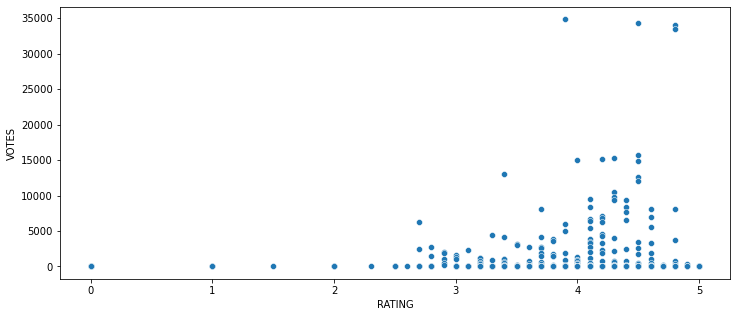

In [4]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=fandango,x='RATING',y='VOTES')
plt.show()

**TASK: Calculate the correlation between the columns:**

In [32]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [3]:
fandango['YEAR'] = fandango['FILM'].str.split('(').str[-1]

In [4]:
fandango['YEAR']=fandango['YEAR'].str.split(')').str[0]

In [5]:
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [128]:
print(fandango.to_markdown())

|     | FILM                                                                   |   STARS |   RATING |   VOTES |   YEAR |
|----:|:-----------------------------------------------------------------------|--------:|---------:|--------:|-------:|
|   0 | Fifty Shades of Grey (2015)                                            |     4   |      3.9 |   34846 |   2015 |
|   1 | Jurassic World (2015)                                                  |     4.5 |      4.5 |   34390 |   2015 |
|   2 | American Sniper (2015)                                                 |     5   |      4.8 |   34085 |   2015 |
|   3 | Furious 7 (2015)                                                       |     5   |      4.8 |   33538 |   2015 |
|   4 | Inside Out (2015)                                                      |     4.5 |      4.5 |   15749 |   2015 |
|   5 | The Hobbit: The Battle of the Five Armies (2014)                       |     4.5 |      4.3 |   15337 |   2014 |
|   6 | Kingsman: The Secret Ser

In [9]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**TASK: How many movies are in the Fandango DataFrame per year?**

In [113]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

<AxesSubplot:xlabel='YEAR', ylabel='Count'>

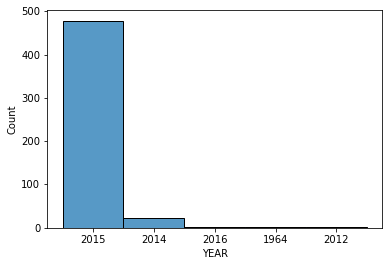

In [118]:
sns.histplot(x='YEAR',data=fandango)

In [12]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: How many movies have zero votes?**

In [10]:
(fandango['VOTES'] == 0).sum()

69

**TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [13]:
fandango=fandango.nlargest(435,'VOTES')

In [14]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
410,"One Cut, One Life (2015)",3.0,3.0,1,2015
411,The Face of an Angel (2015),3.0,3.0,1,2015
412,The Living (2015),3.0,3.0,1,2015
414,Buggs Bunny (2015),4.0,4.0,1,2015




**Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

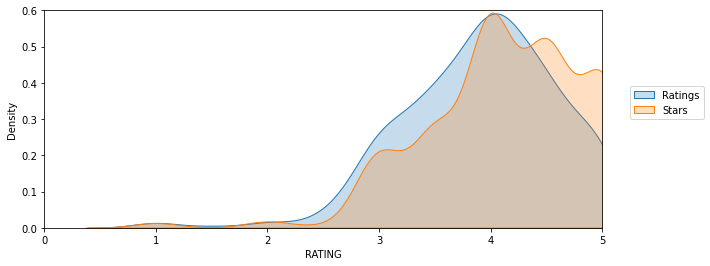

In [28]:
plt.figure(figsize=(10,4))
plt.xlim(0,5)
plt.ylim(0,0.6)
sns.kdeplot(x='RATING',data=fandango,shade=True,label='Ratings')
sns.kdeplot(x='STARS',data=fandango,shade=True,label='Stars')

plt.legend(loc=(1.05,0.5))
plt.show()

**Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING.**

In [6]:
fandango['STARS_DIFF'] = (fandango['STARS'] - fandango['RATING']).round(1)

In [7]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**Creating a count plot to display the number of times a certain difference occurs:**

In [31]:
fandango['STARS_DIFF'].value_counts()

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STARS_DIFF, dtype: int64

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

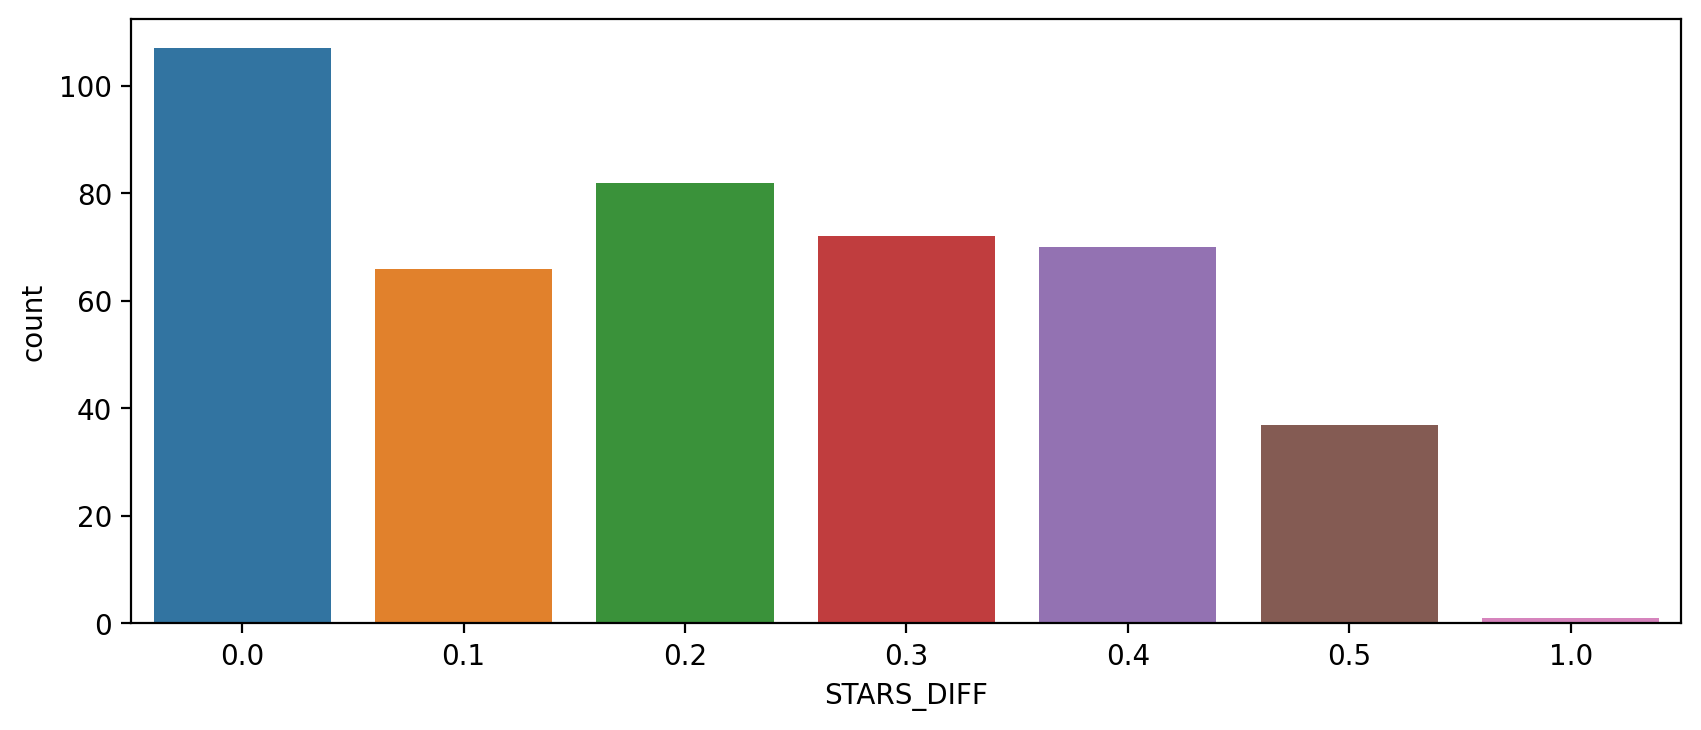

In [219]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='STARS_DIFF',data=fandango)

**We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [225]:
fandango[fandango['STARS_DIFF'] >=1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

In [57]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [58]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [228]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [229]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [230]:
print(all_sites.to_markdown())

|     | FILM                                                                   |   RottenTomatoes |   RottenTomatoes_User |   Metacritic |   Metacritic_User |   IMDB |   Metacritic_user_vote_count |   IMDB_user_vote_count |
|----:|:-----------------------------------------------------------------------|-----------------:|----------------------:|-------------:|------------------:|-------:|-----------------------------:|-----------------------:|
|   0 | Avengers: Age of Ultron (2015)                                         |               74 |                    86 |           66 |               7.1 |    7.8 |                         1330 |                 271107 |
|   1 | Cinderella (2015)                                                      |               85 |                    80 |           67 |               7.5 |    7.1 |                          249 |                  65709 |
|   2 | Ant-Man (2015)                                                         |               80 |     

### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

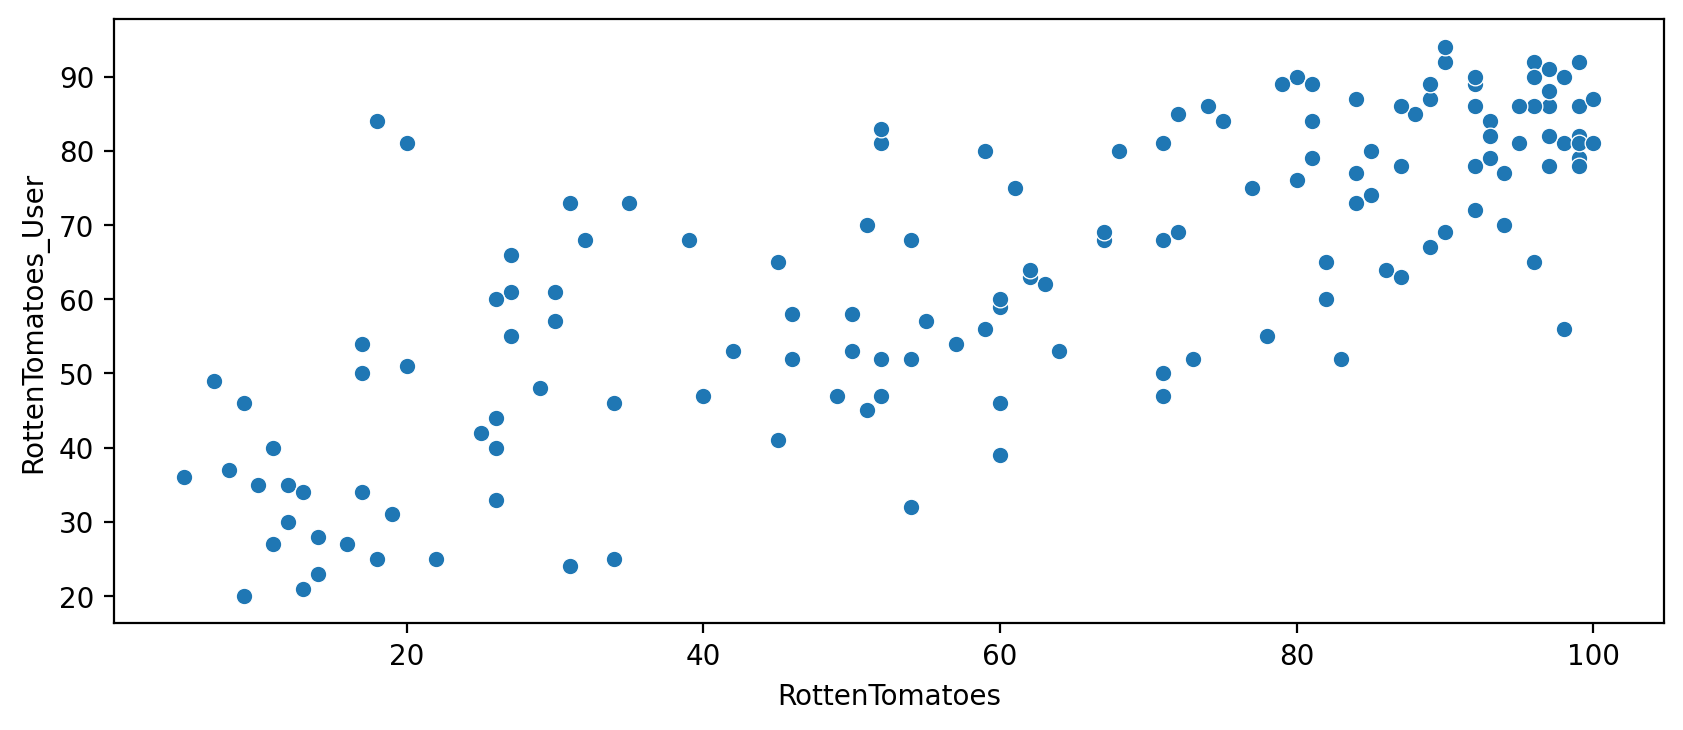

In [233]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.


**Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [59]:
all_sites['RT_DIFF'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [60]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [61]:
abs(all_sites['RT_DIFF']).mean()

15.095890410958905

**Plot the distribution of the differences between RT Critics Score and RT User Score.**

Text(0.5, 1.0, 'RT Critics score minus RT User score')

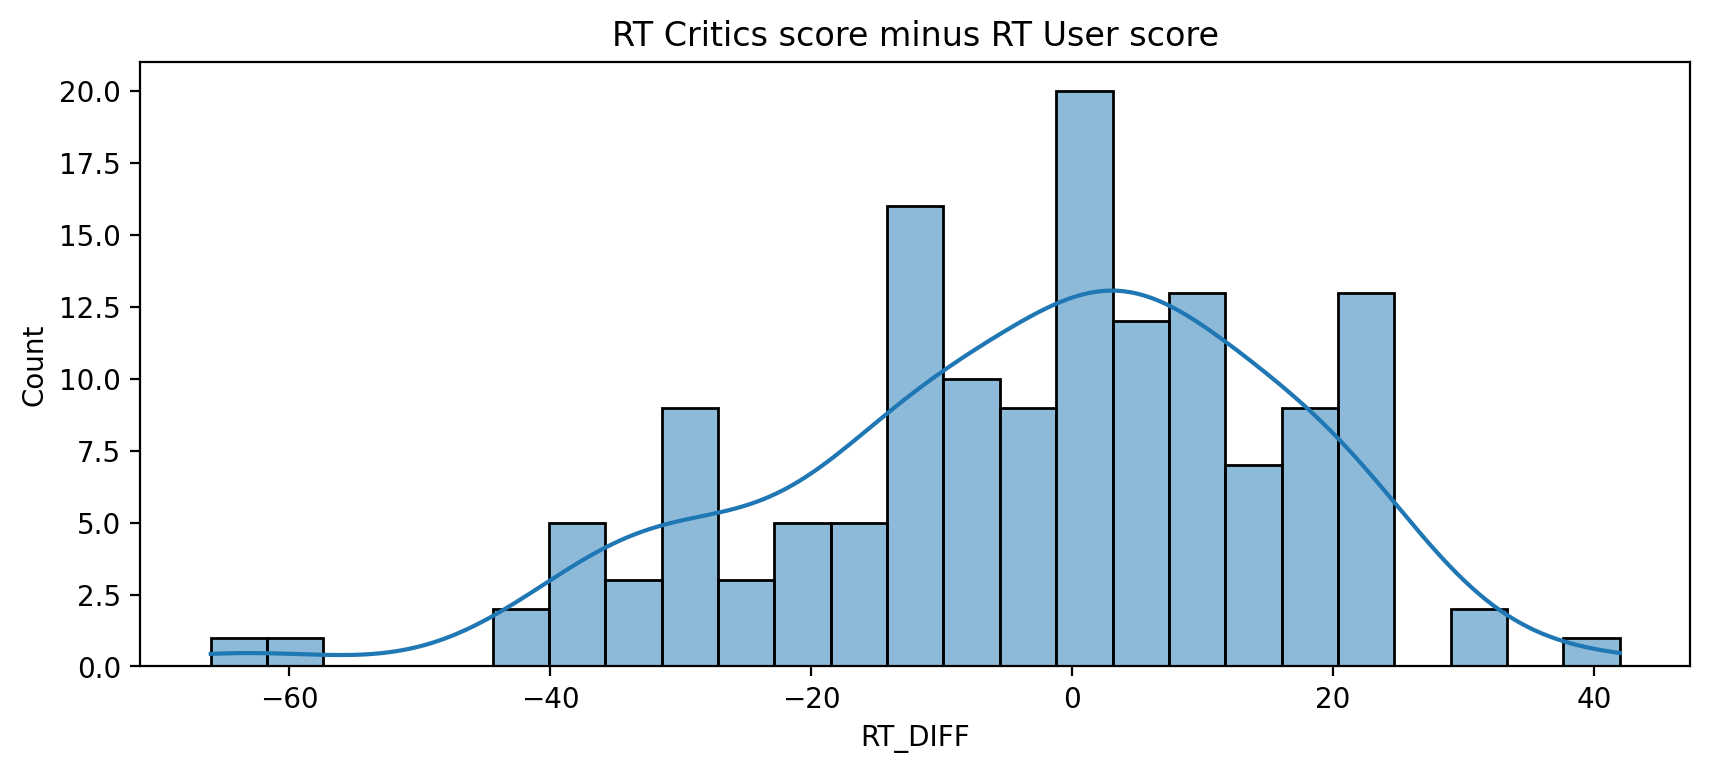

In [249]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x='RT_DIFF',data=all_sites,bins=25,kde=True)
plt.title('RT Critics score minus RT User score')

**TASK: Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

In [62]:
all_sites['RT_DIFF_ABS'] = abs(all_sites['RT_DIFF'])

In [63]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,RT_DIFF_ABS
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14


<AxesSubplot:xlabel='RT_DIFF_ABS', ylabel='Count'>

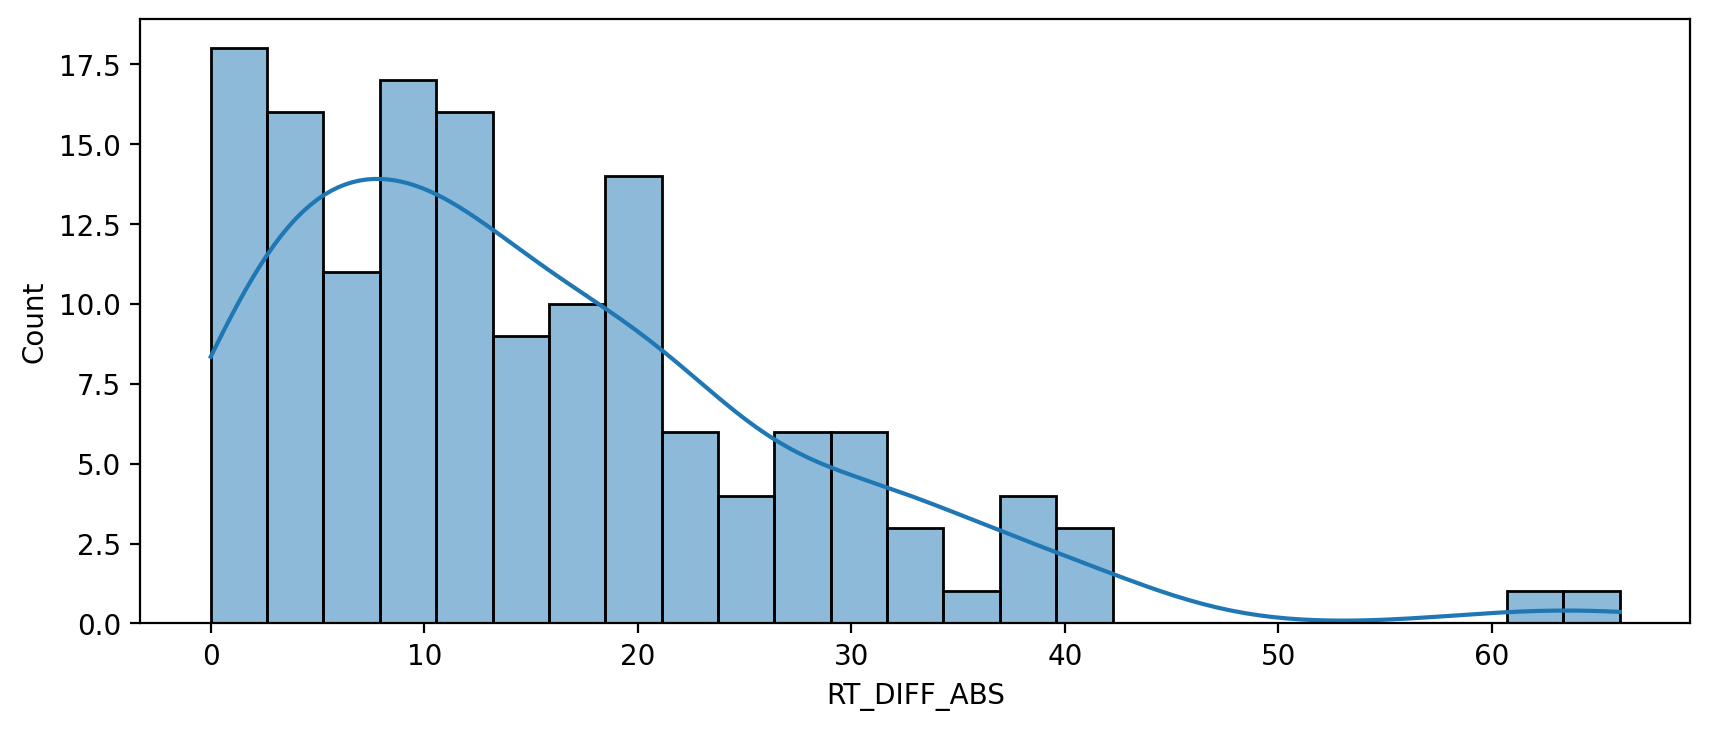

In [290]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x='RT_DIFF_ABS',data=all_sites,bins=25,kde=True)

**Let's find out which movies are causing the largest differences.**

**The top 5 movies users rated higher than critics on average:**

In [40]:
print("Users Love but Critics Hate")
all_sites.nsmallest(5,'RT_DIFF')[['FILM','RT_DIFF']]

Users Love but Critics Hate


,FILM,RT_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Now, The top 5 movies critics scores higher than users on average.**

In [41]:
print('Critics love,but Users Hate')
all_sites.nlargest(5,'RT_DIFF')[['FILM','RT_DIFF']]

Critics love,but Users Hate


,FILM,RT_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 100.0)

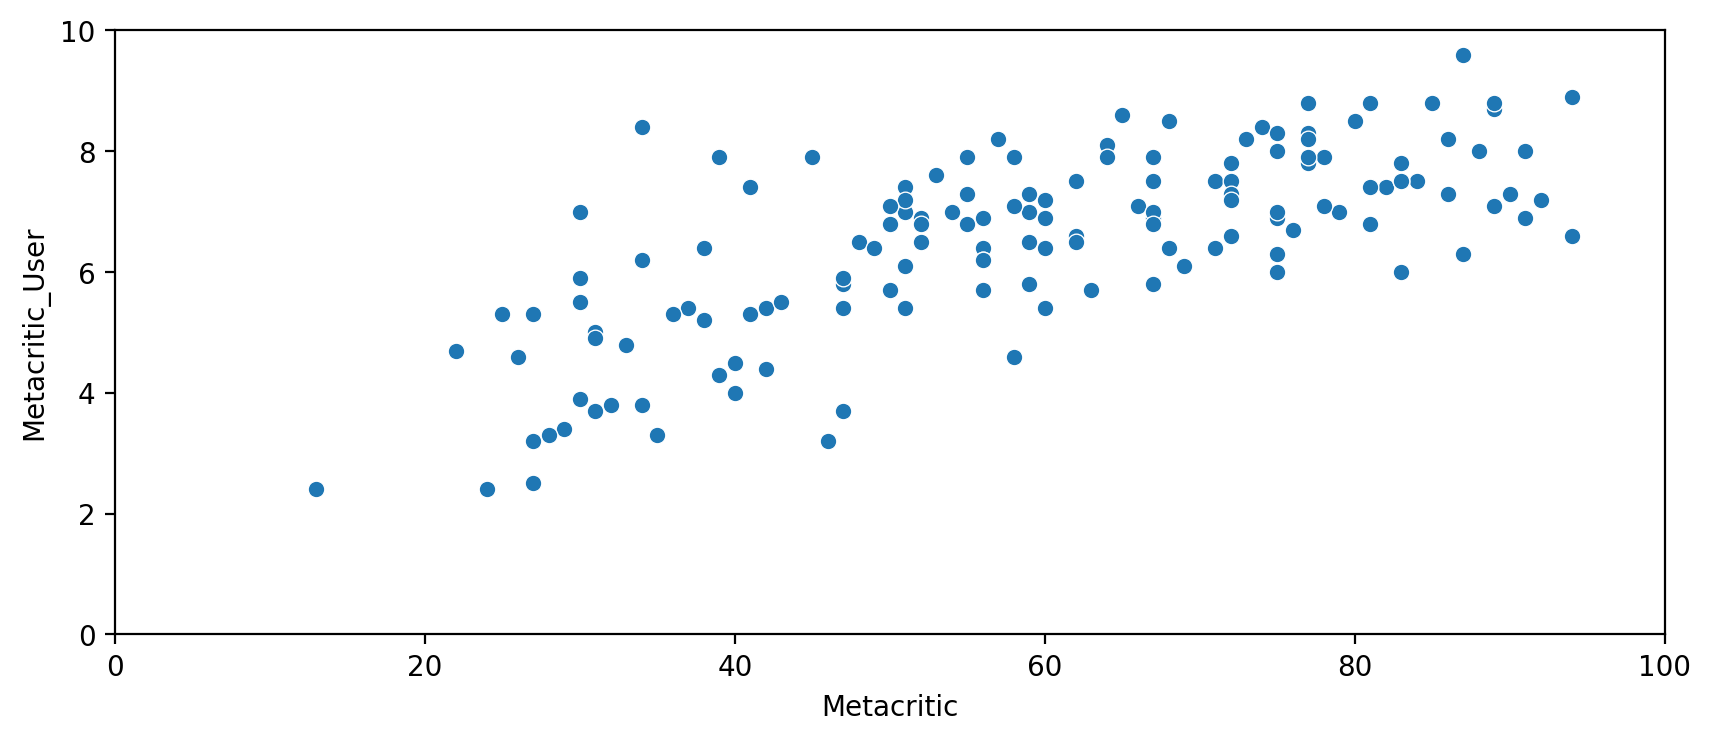

In [302]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(y='Metacritic_User',x='Metacritic',data=all_sites)
plt.ylim(0,10)
plt.xlim(0,100)

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

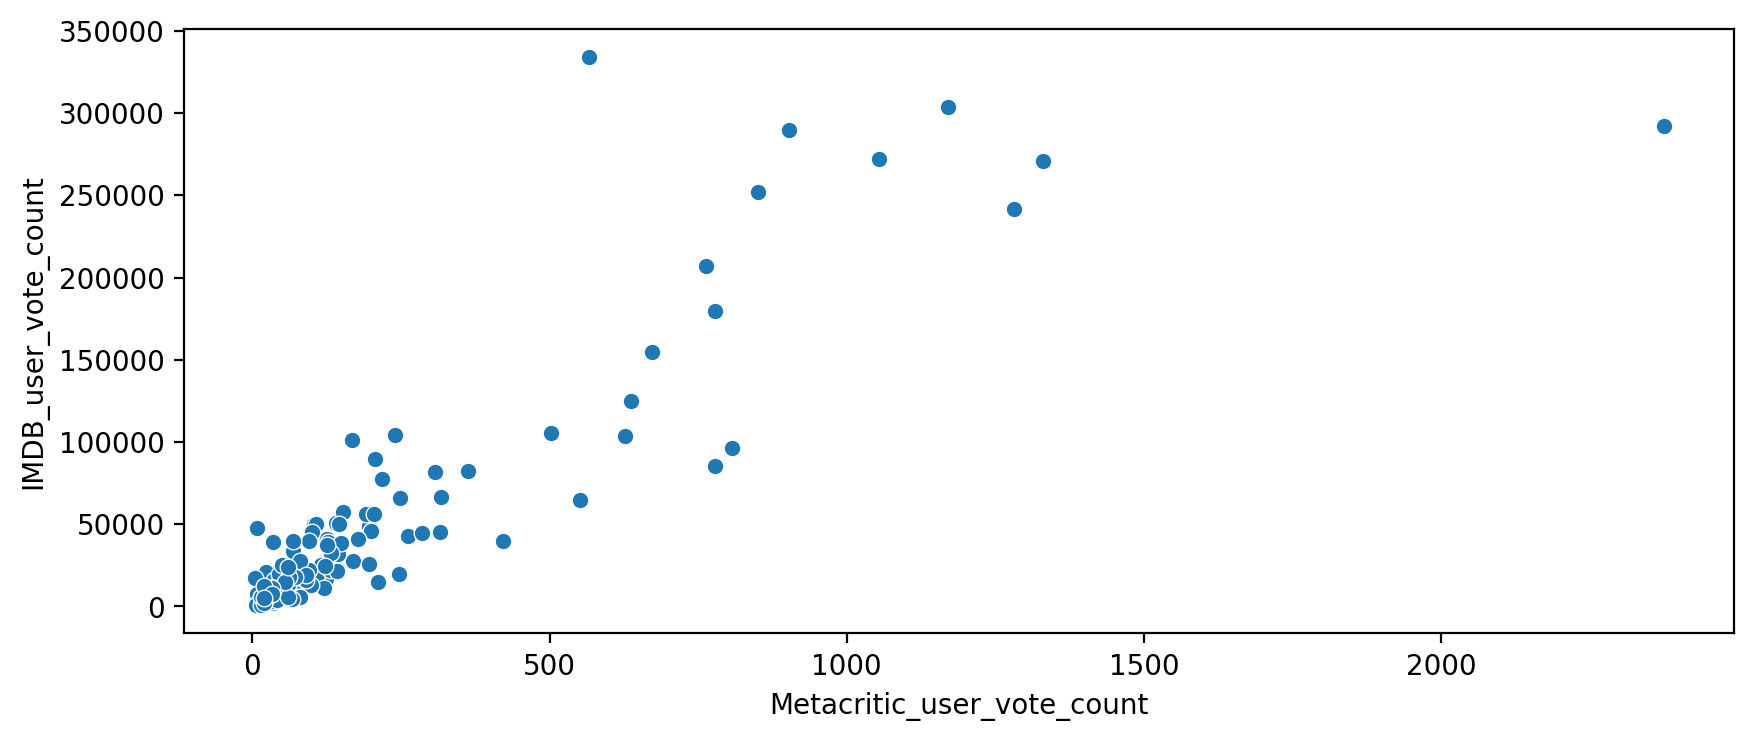

In [42]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(y='IMDB_user_vote_count',x='Metacritic_user_vote_count',data=all_sites)
#lt.ylim(,35000)
#lt.xlim(-,2500)
plt.show()

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**What movie has the highest IMDB user vote count?**

In [311]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,RT_DIFF_ABS
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


**What movie has the highest Metacritic User Vote count?**

In [312]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,RT_DIFF_ABS
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [64]:
mergedDs = pd.merge(fandango,all_sites, on ='FILM',how='inner')

In [65]:
mergedDs = pd.merge(fandango.drop('STARS_DIFF', axis=1), all_sites.drop('RT_DIFF_ABS', axis=1))

In [66]:
mergedDs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RT_DIFF                     145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [51]:
mergedDs.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 


**Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango.**


In [67]:
mergedDs['RottenTomatoes_RAT'] =  mergedDs['RottenTomatoes']/20

In [68]:
mergedDs['RottenTomatoes_User_RAT'] =  mergedDs['RottenTomatoes_User']/20

In [69]:
mergedDs['Metacritic_RAT'] =  mergedDs['Metacritic']/20

In [70]:
mergedDs['Metacritic_User_RAT'] =  mergedDs['Metacritic_User']/2

In [71]:
mergedDs['IMDB_RAT'] =  mergedDs['IMDB']/2

In [72]:
mergedDs.round(1).head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,RottenTomatoes_RAT,RottenTomatoes_User_RAT,Metacritic_RAT,Metacritic_User_RAT,IMDB_RAT
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [74]:
Ratings_in_5 =mergedDs[['STARS','RATING','RottenTomatoes_RAT','RottenTomatoes_User_RAT','Metacritic_RAT','Metacritic_User_RAT','IMDB_RAT']]

In [75]:
Ratings_in_5.head()

,STARS,RATING,RottenTomatoes_RAT,RottenTomatoes_User_RAT,Metacritic_RAT,Metacritic_User_RAT,IMDB_RAT
0,4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,4.5,4.5,4.90,4.50,4.70,4.45,4.30


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**Create a plot comparing the distributions of normalized ratings across all sites.**

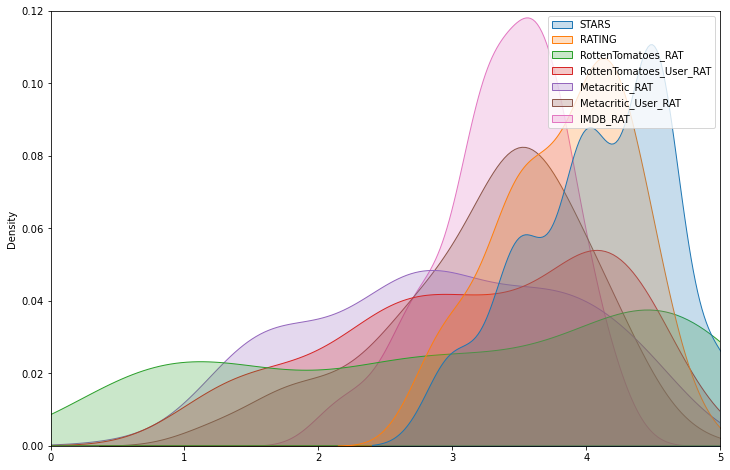

In [81]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=Ratings_in_5,shade=True)

#sns.kdeplot(x='STARS',data=mergedDs,shade=True,label='stars')
#sns.kdeplot(x='RottenTomatoes_RAT',data=mergedDs,shade=True,label='RottenTomatoes_RAT')
#sns.kdeplot(x='RATING',data=mergedDs,shade=True,label='RATING')
#sns.kdeplot(x='RottenTomatoes_User_RAT',data=mergedDs,shade=True,label='RottenTomatoes_User_RAT')
#sns.kdeplot(x='Metacritic_RAT',data=mergedDs,shade=True,label='Metacritic_RAT')
#sns.kdeplot(x='Metacritic_User_RAT',data=mergedDs,shade=True,label='Metacritic_User_RAT')
#sns.kdeplot(x='IMDB_RAT',data=mergedDs,shade=True,label='IMDB_RAT')

plt.ylim(0,0.12)
plt.xlim(0,5)

#plt.legend(loc=(0.01,0.7))
plt.show()

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

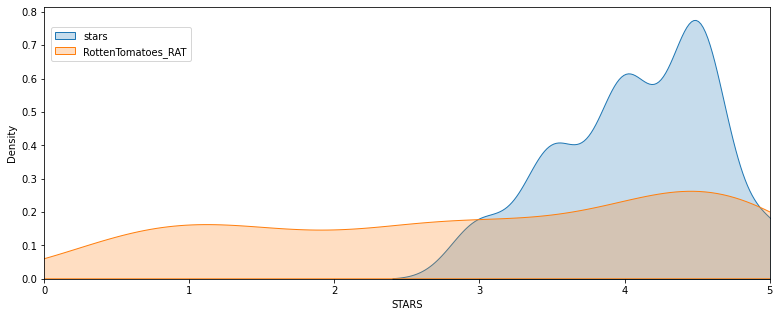

In [73]:
plt.figure(figsize=(13,5))
plt.xlim(0,5)
sns.kdeplot(x='STARS',data=mergedDs,shade=True,label='stars')
sns.kdeplot(x='RottenTomatoes_RAT',data=mergedDs,shade=True,label='RottenTomatoes_RAT')

plt.legend(loc=(0.01,0.8))
plt.show()

**Create a histplot comparing all normalized scores.**

<AxesSubplot:ylabel='Count'>

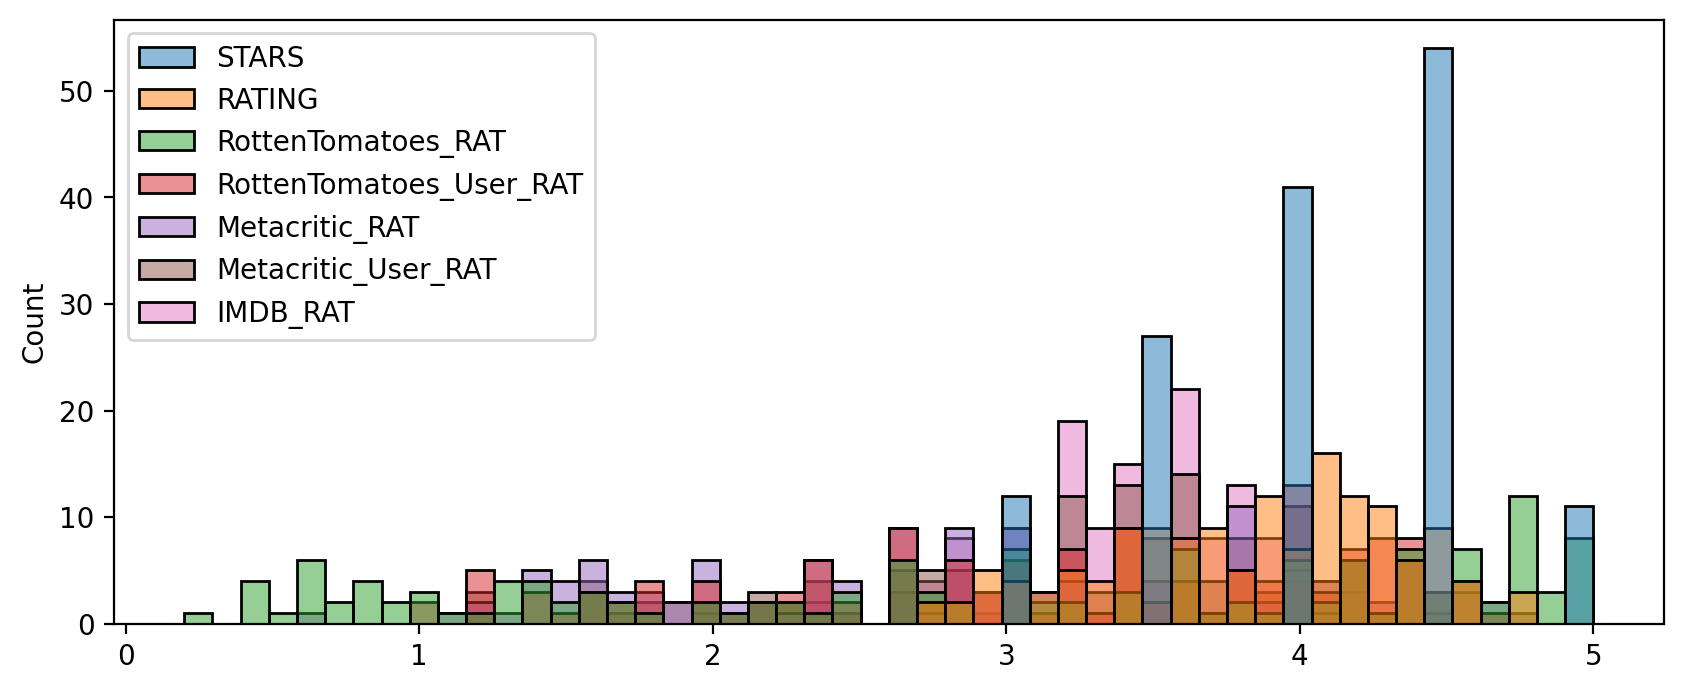

In [28]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=new,bins=50)


### How are the worst movies rated across all platforms?

**Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies.**

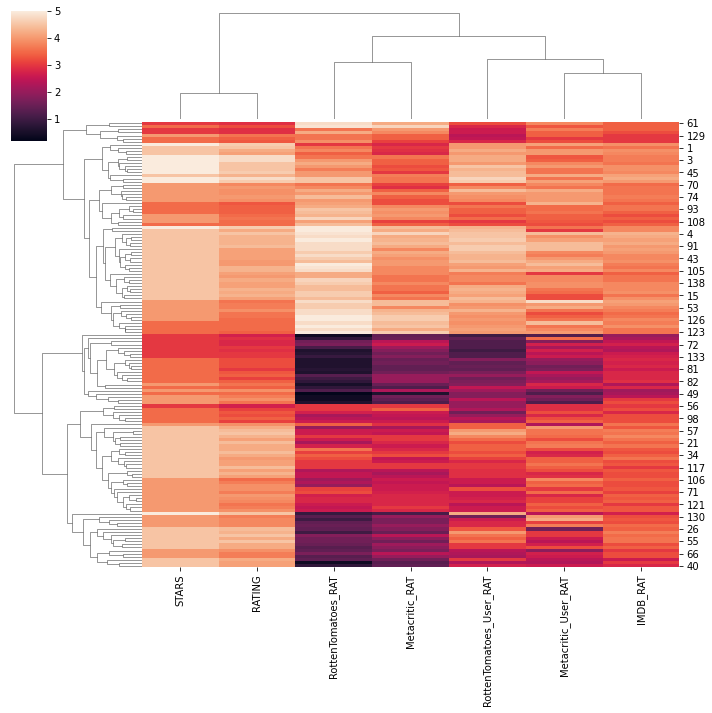

In [31]:
sns.clustermap(data=new)

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [93]:
norm_scores = mergedDs[['FILM','STARS','RATING','RottenTomatoes_RAT','RottenTomatoes_User_RAT','Metacritic_RAT','Metacritic_User_RAT','IMDB_RAT']]

In [94]:
norm_scores.head()

,FILM,STARS,RATING,RottenTomatoes_RAT,RottenTomatoes_User_RAT,Metacritic_RAT,Metacritic_User_RAT,IMDB_RAT
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30


In [96]:
norm_scores.nsmallest(10,'RottenTomatoes_RAT').round(1)

,FILM,STARS,RATING,RottenTomatoes_RAT,RottenTomatoes_User_RAT,Metacritic_RAT,Metacritic_User_RAT,IMDB_RAT
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
88,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

<AxesSubplot:ylabel='Density'>

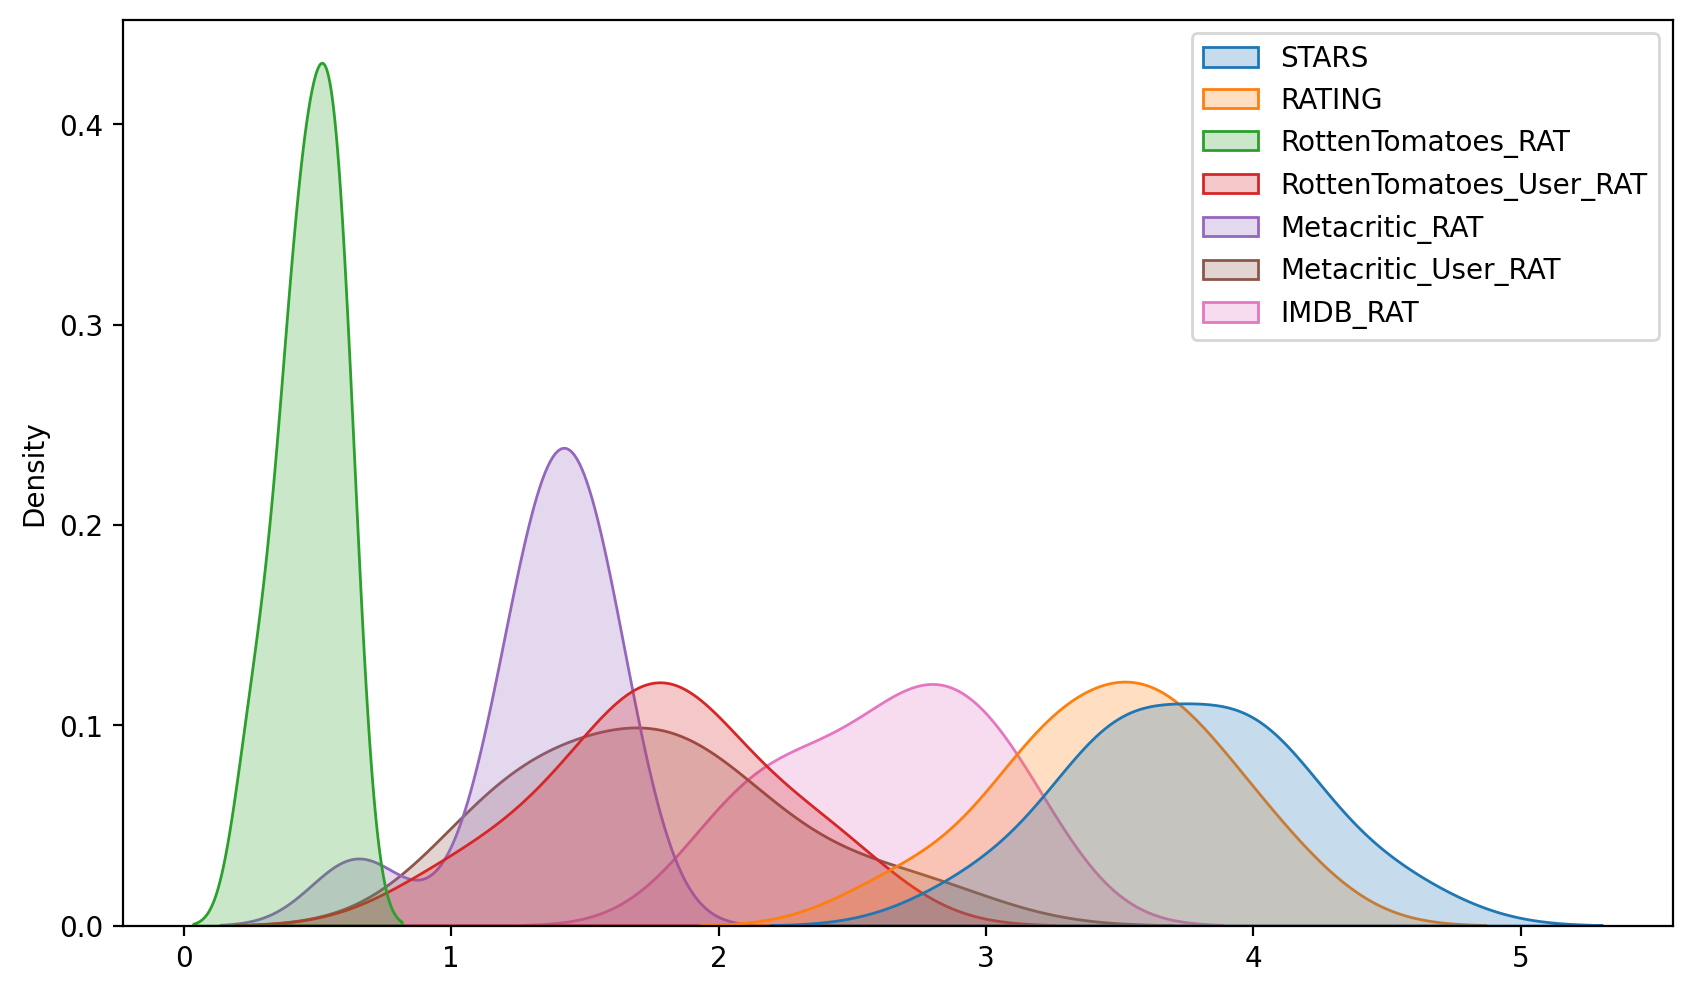

In [99]:
plt.figure(figsize=(10,6),dpi=200)
sns.kdeplot(data=norm_scores.nsmallest(10,'RottenTomatoes_RAT'),shade=True)

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!]. Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.888] across the other platforms!**

In [101]:
norm_scores.iloc[25]

FILM                       Taken 3 (2015)
STARS                                 4.5
RATING                                4.1
RottenTomatoes_RAT                   0.45
RottenTomatoes_User_RAT               2.3
Metacritic_RAT                        1.3
Metacritic_User_RAT                   2.3
IMDB_RAT                             3.05
Name: 25, dtype: object

In [102]:
0.45+2.3+1.3+2.3+3.05

9.399999999999999

In [106]:
9.4/5

1.8800000000000001

----